# Cow Activity Recognition Using Accelerometer Data

In this project we will learn about cow activity recognition using Accelerometer and CNN. In this project we are going to use accelerometer data to train the model so that it can predict the cow activity. We are going to use 2D Convolutional Neural Networks to build the model. Dimention of DataSet is (12263524, 11). The dataset contains nine different labels (EATING,DRINKING,WALKING,STANDING,LYING,RUMINATING_STANDING,RUMINATING_LYING,GROOMING,IDLE_OTHER).



In this we will be given 3-Accelerometer Data along with the time in 3-Dimensions(X, Y & Z) and we need to classify that what is the activity of cow. So there are 9 label.
We will be applying here Convolutional Neural Network along with few Hidden Layers, then finally it will classify 1 activity out of 9 activities.

# Target of project

Target F1 score is above 80%.

# Import some important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.5.0


In [3]:
import warnings
warnings.filterwarnings("ignore")

# Data Collection

In [4]:
EATING = pd.read_csv("E:\ML project intern/E1_train.csv")
DRINKING = pd.read_csv("E:\ML project intern/D2_train.csv")
WALKING = pd.read_csv("E:\ML project intern/W3_train.csv")
STANDING = pd.read_csv("E:\ML project intern/S4_train.csv")
LYING = pd.read_csv("E:\ML project intern/L5_train.csv")
RUMINATING_STANDING = pd.read_csv("E:\ML project intern/RS6_train.csv")
RUMINATING_LYING = pd.read_csv("E:\ML project intern/RL7_train.csv")
GROOMING = pd.read_csv("E:\ML project intern/G8_train.csv")
IDLE_OTHER = pd.read_csv("E:\ML project intern/I9_train.csv")

Activity=[EATING,DRINKING,WALKING,STANDING,LYING,RUMINATING_STANDING,RUMINATING_LYING,GROOMING,IDLE_OTHER]

data = pd.concat(Activity)

# Properties of Data

In [5]:
data.head()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,1628308980,0.376465,0.860840,-0.114746,22.521973,-18.981934,15.075683,-297.0,1432.5,508.5,1
1,1628308980,0.325684,0.889160,-0.103516,25.085449,3.417969,12.756348,-292.5,1447.5,520.5,1
2,1628308980,0.269531,0.931641,-0.067383,24.353027,20.019531,11.352539,-297.0,1423.5,523.5,1
3,1628308980,0.225098,0.958008,-0.031250,19.104004,23.803711,7.019043,-297.0,1431.0,523.5,1
4,1628308980,0.204590,0.961426,-0.001953,15.258789,23.193359,2.807617,-286.5,1431.0,538.5,1


In [6]:
print("Dimention of DataSet:",data.shape)

Dimention of DataSet: (12263524, 11)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12263524 entries, 0 to 405262
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   time    int64  
 1   acc_x   float64
 2   acc_y   float64
 3   acc_z   float64
 4   gyr_x   float64
 5   gyr_y   float64
 6   gyr_z   float64
 7   mag_x   float64
 8   mag_y   float64
 9   mag_z   float64
 10  label   int64  
dtypes: float64(9), int64(2)
memory usage: 1.1 GB


All the data type are either int or float

In [8]:
data.describe()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
count,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07
mean,1.628243e+09,-2.807402e-02,6.211683e-01,1.081455e-01,8.722215e-01,-1.837340e+00,-6.375345e-01,-2.934089e+02,4.300977e+02,2.037158e+02,4.320899e+00
std,1.205662e+05,2.622167e-01,7.084800e-01,1.888613e-01,1.282481e+01,2.014151e+01,1.030093e+01,2.736141e+02,5.969720e+02,4.382996e+02,2.417436e+00
min,1.628067e+09,-1.599756e+01,-1.314160e+01,-1.599121e+01,-1.999756e+03,-1.998779e+03,-1.999756e+03,-1.534500e+03,-1.057500e+03,-1.152000e+03,1.000000e+00
25%,1.628106e+09,-2.182617e-01,8.281250e-01,3.173830e-02,-2.014160e+00,-5.676270e+00,-2.685547e+00,-4.635000e+02,-4.950000e+01,6.900000e+01,1.000000e+00
50%,1.628312e+09,-2.490230e-02,9.370118e-01,1.230469e-01,8.544922e-01,-1.892090e+00,-6.103516e-01,-2.535000e+02,1.395000e+02,3.165000e+02,4.000000e+00
75%,1.628335e+09,1.616211e-01,9.736329e-01,2.006836e-01,3.723145e+00,1.892090e+00,1.464844e+00,-1.260000e+02,9.795000e+02,5.520000e+02,6.000000e+00
max,1.628421e+09,1.051514e+01,1.182617e+01,1.599854e+01,1.999756e+03,1.999939e+03,1.973511e+03,7.920000e+02,1.918500e+03,1.179000e+03,9.000000e+00


In [9]:
data.isnull().sum()

time     0
acc_x    0
acc_y    0
acc_z    0
gyr_x    0
gyr_y    0
gyr_z    0
mag_x    0
mag_y    0
mag_z    0
label    0
dtype: int64

No nul values presented in our DataSet

In [10]:
data["label"].value_counts()

1    3405702
4    2539806
7    1928968
5    1711687
6    1703683
9     405263
8     368607
3     145369
2      54439
Name: label, dtype: int64

# Checking Duplicate Value or Multi Colinearity

In [11]:
data.corr()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
time,1.000000,-0.108821,-0.118527,0.054428,-0.005030,-0.002011,-0.008394,0.187664,0.066354,0.032587,-0.156390
acc_x,-0.108821,1.000000,0.068235,-0.064783,-0.001430,0.006372,-0.004203,-0.481286,0.068210,0.144633,0.181582
acc_y,-0.118527,0.068235,1.000000,-0.227910,-0.023733,0.006674,0.020762,-0.025147,0.382588,0.574042,-0.018375
acc_z,0.054428,-0.064783,-0.227910,1.000000,0.012389,-0.009027,-0.010025,0.157934,-0.198680,-0.337945,-0.109248
gyr_x,-0.005030,-0.001430,-0.023733,0.012389,1.000000,-0.009946,-0.088246,-0.004642,-0.009834,-0.033924,0.000211
gyr_y,-0.002011,0.006372,0.006674,-0.009027,-0.009946,1.000000,0.041503,-0.008726,0.005924,0.013075,0.002118
gyr_z,-0.008394,-0.004203,0.020762,-0.010025,-0.088246,0.041503,1.000000,0.004679,-0.006413,0.022479,0.001470
mag_x,0.187664,-0.481286,-0.025147,0.157934,-0.004642,-0.008726,0.004679,1.000000,-0.323132,-0.168128,-0.160687
mag_y,0.066354,0.068210,0.382588,-0.198680,-0.009834,0.005924,-0.006413,-0.323132,1.000000,0.179491,0.070915
mag_z,0.032587,0.144633,0.574042,-0.337945,-0.033924,0.013075,0.022479,-0.168128,0.179491,1.000000,0.069653


<AxesSubplot:>

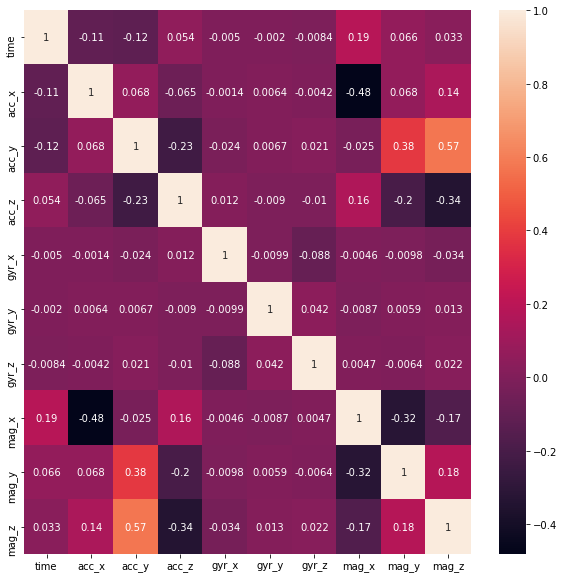

In [12]:
corr = data.iloc[:,:-1].corr()
top_features = corr.index
plt.figure(figsize=(10,10))
sns.heatmap(data[top_features].corr(),annot=True)

No multi-colinearity

# How the accelerometer data looks visually
There is a different patterns for seperate activities, so we can see that how that pattern looks like. We are only shortlisting the X, Y and Z values out of that data, and we are considering only 200 points of that data to plot in the graph.

In [13]:
def plot_activity(label, data):
    activity_row = (data["label"]==label)
    data=data[activity_row]
    data=data[['acc_x','acc_y','acc_z','gyr_x','gyr_y','gyr_z','mag_x','mag_y','mag_z']]
    data=data[:200]
    ax=data.plot(subplots=True, figsize=(18,14), title=label)

In [14]:
Activity=data["label"].value_counts().index

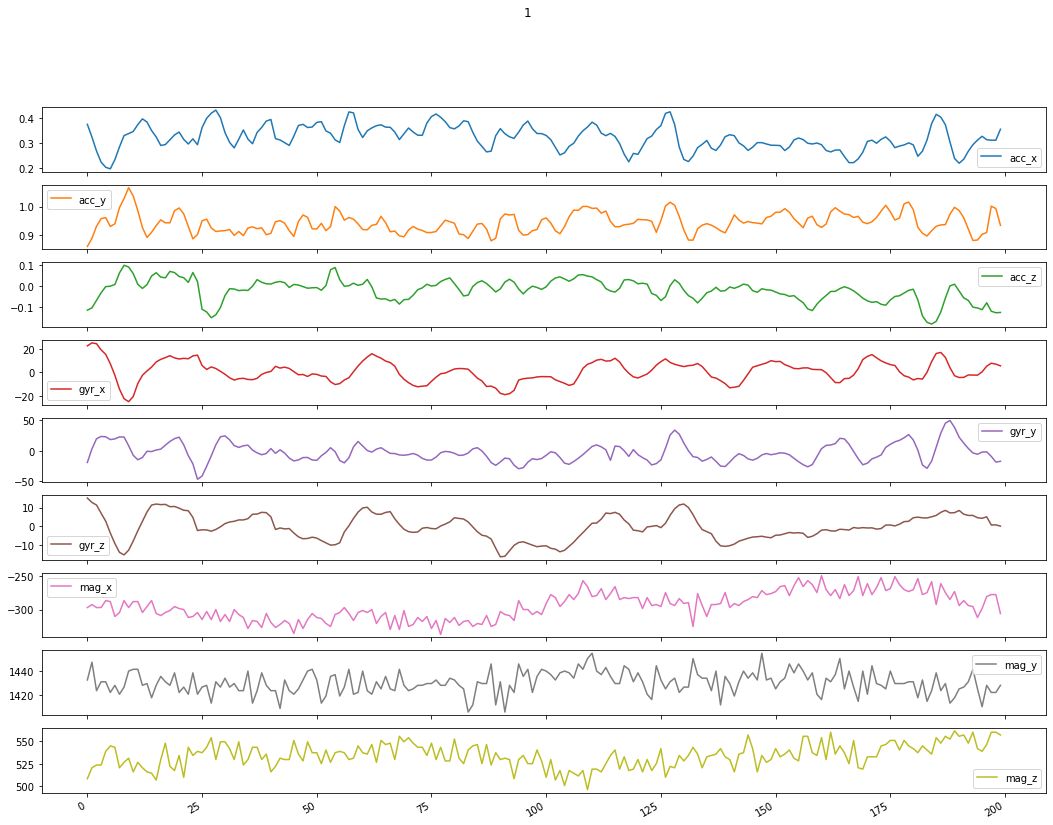

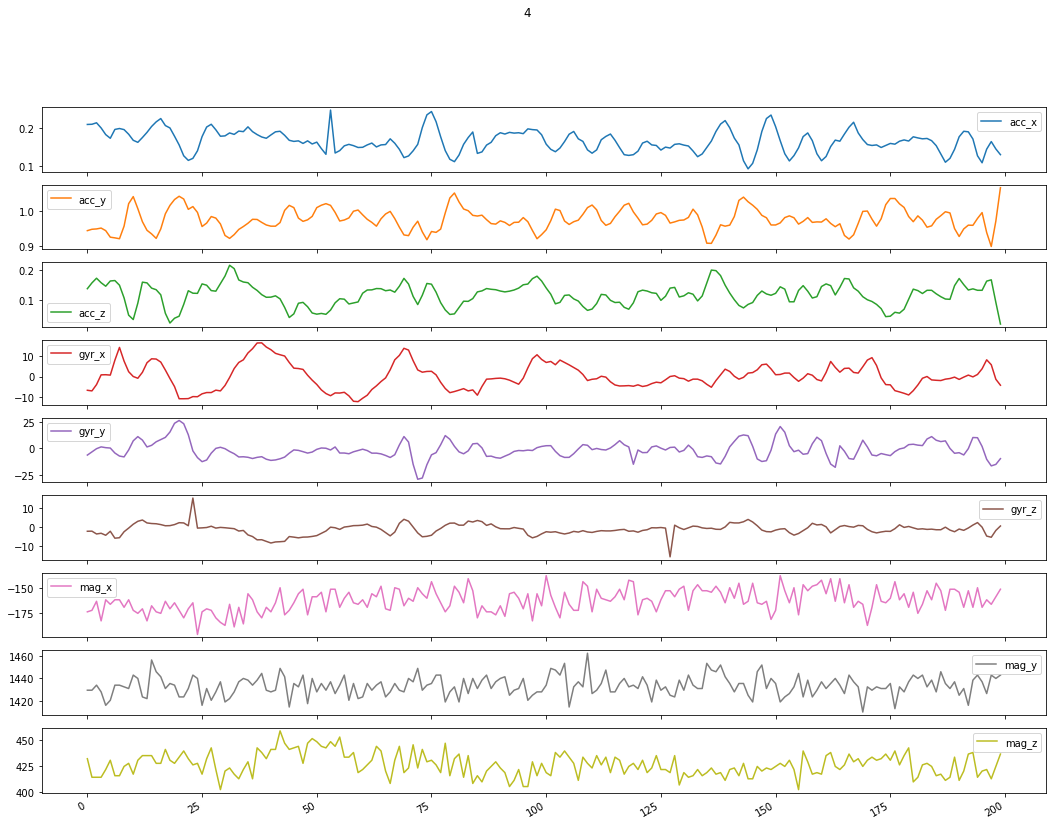

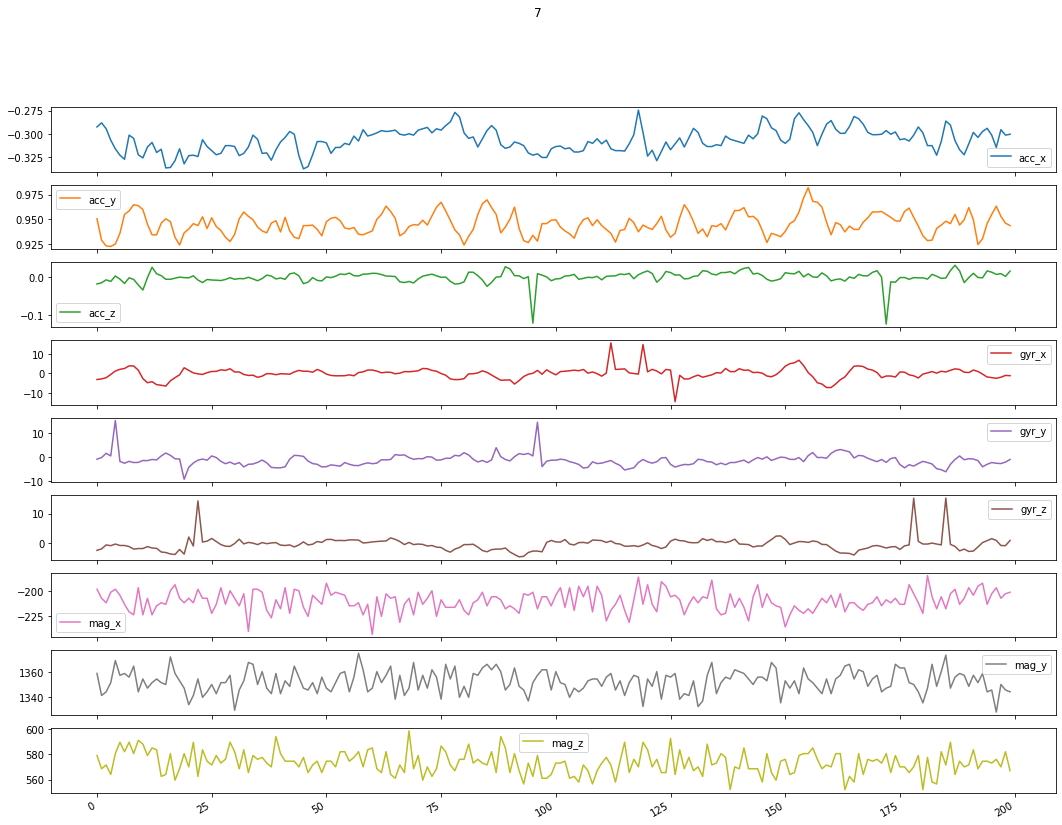

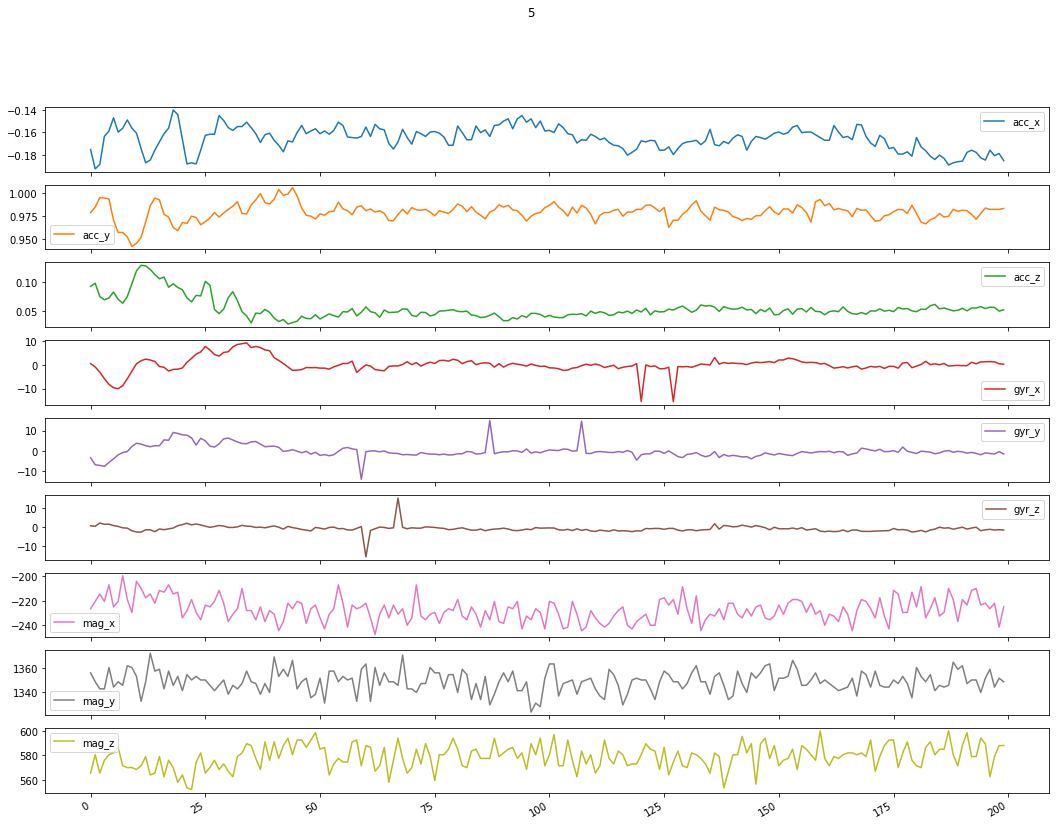

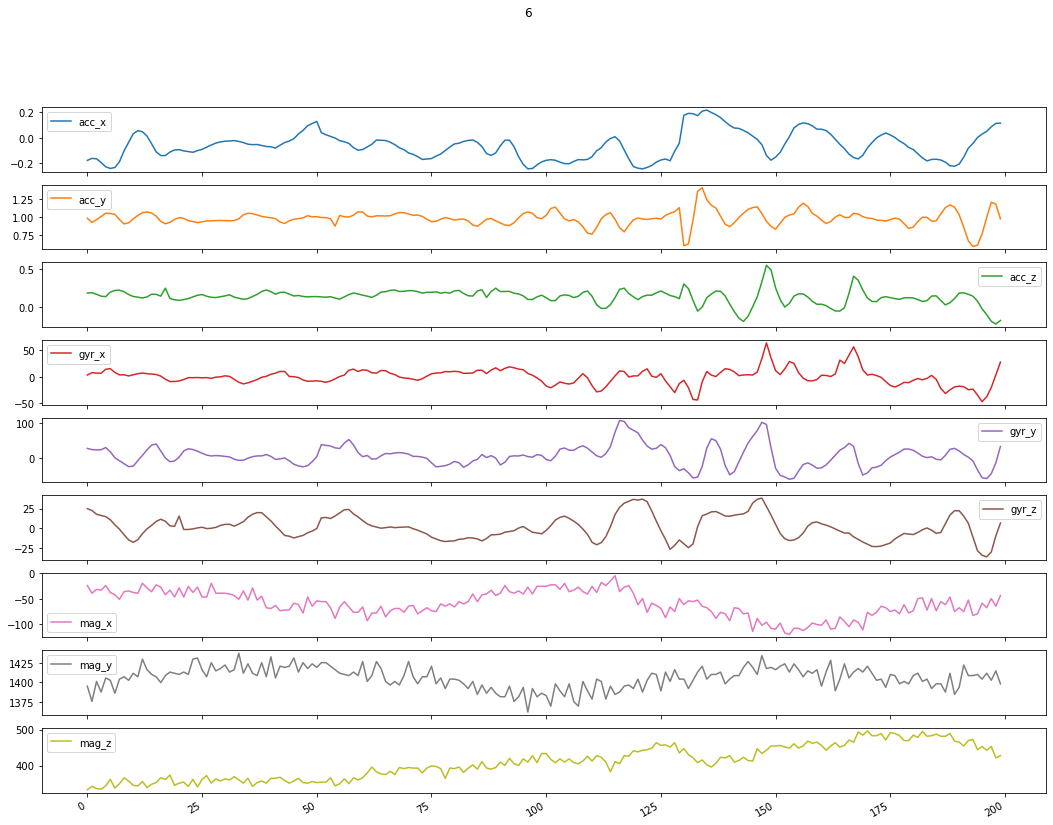

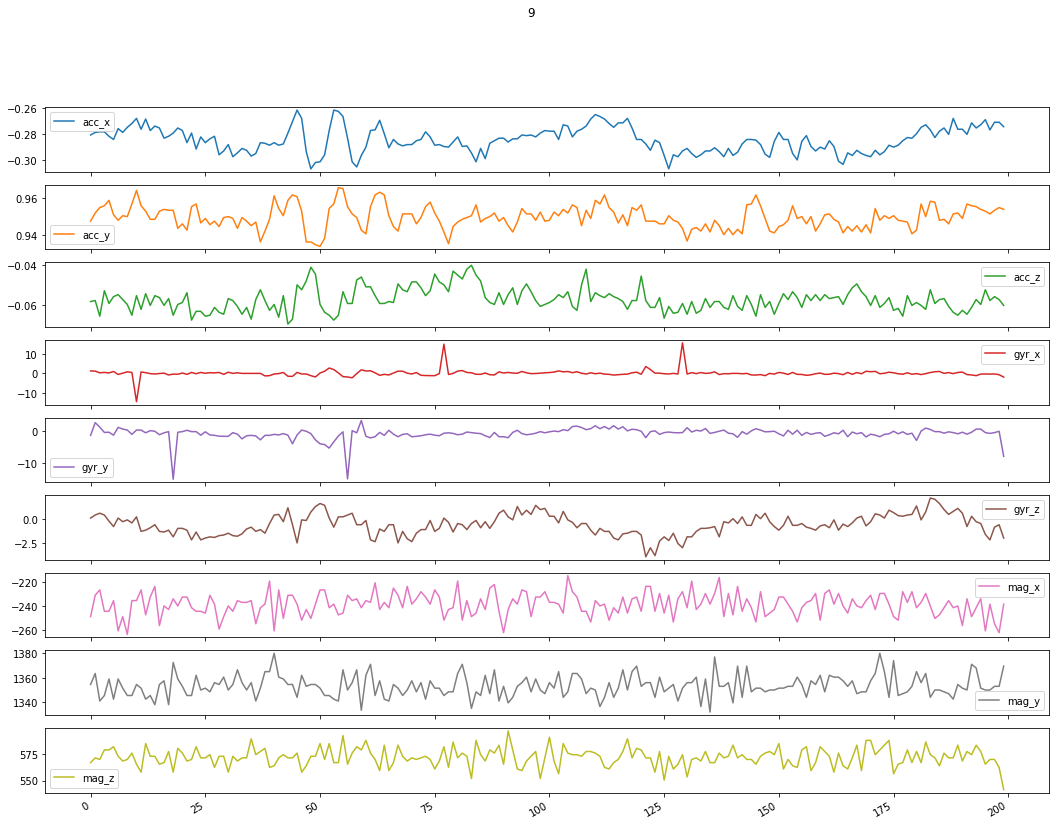

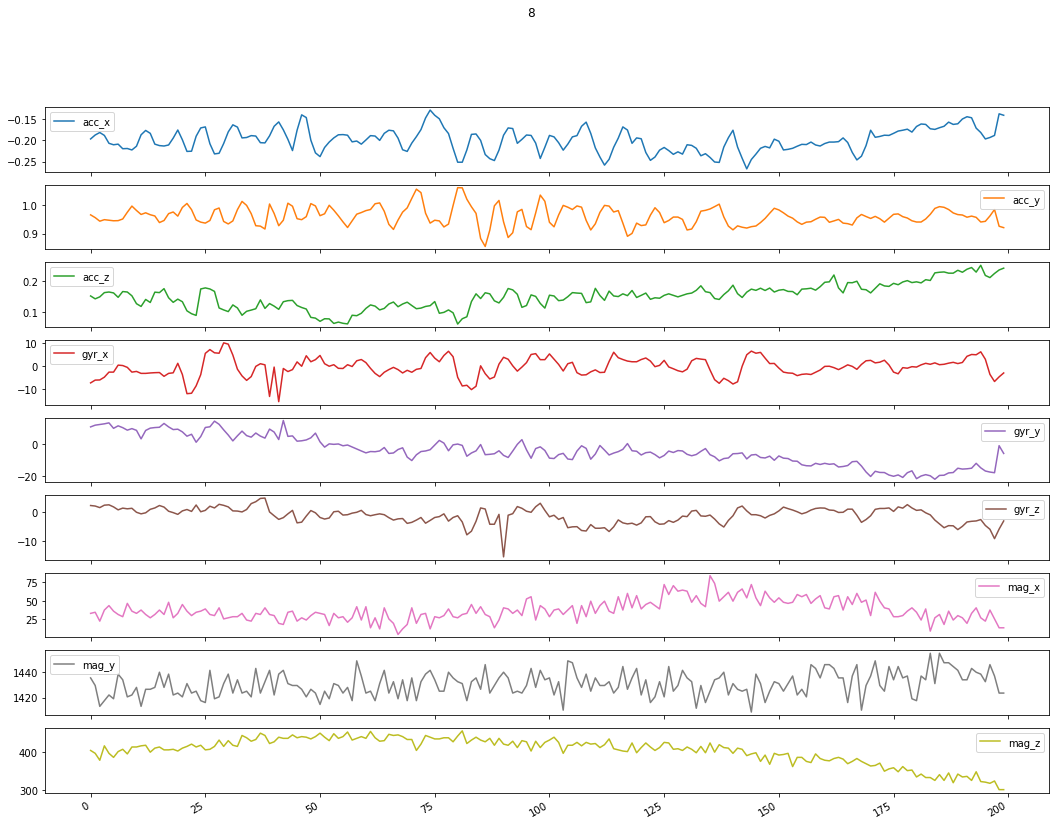

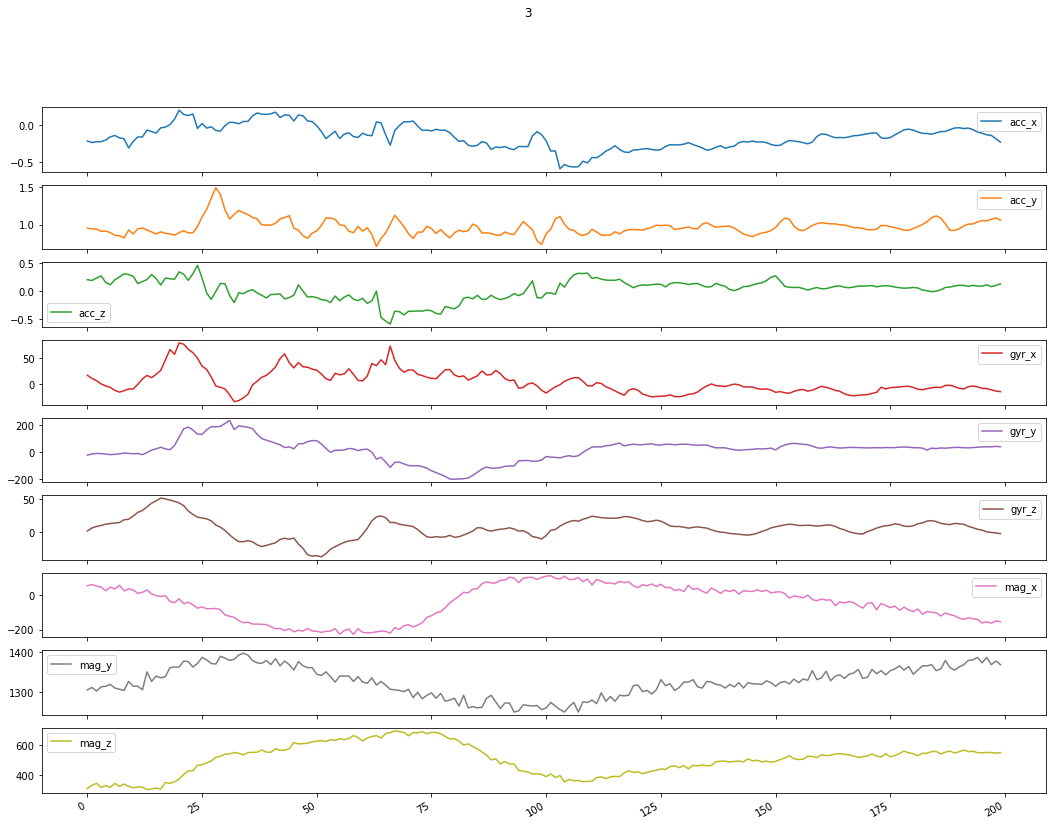

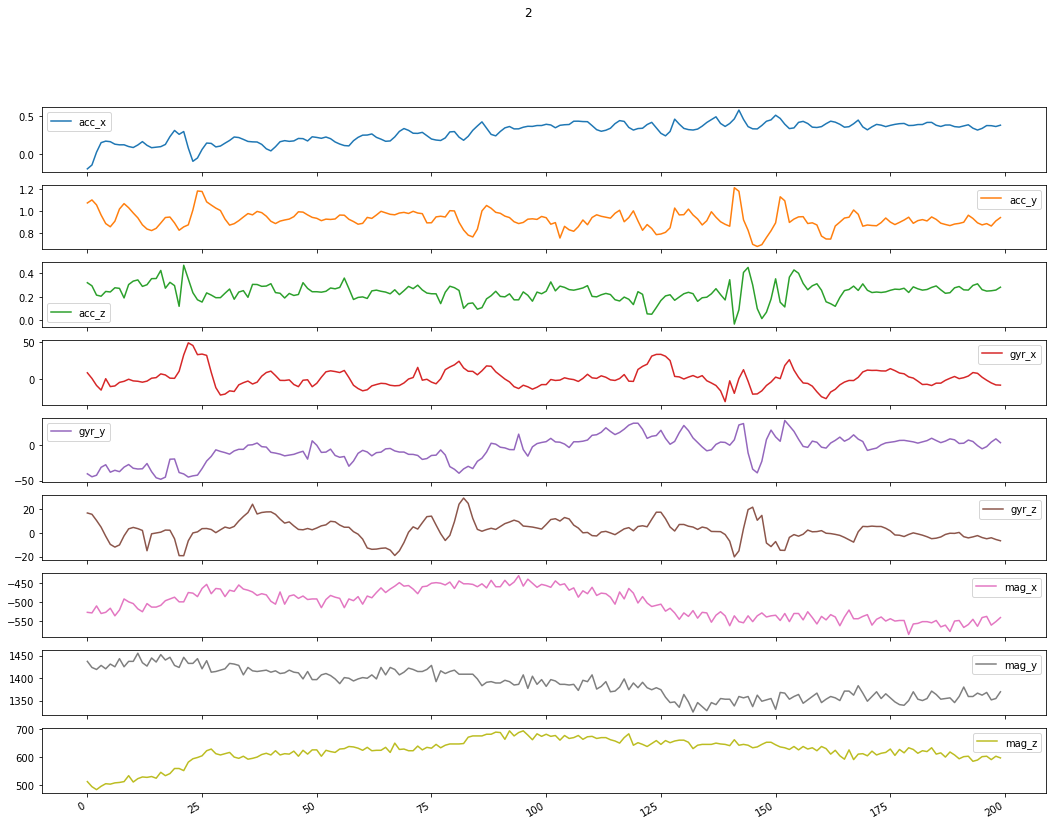

In [15]:
for i in Activity:
    plt.show(plot_activity(i, data))

#    1 : Eating
#    2 : DRINKING
#    3 : WALKING
#    4 : STANDING
#    5 : LYING
#    6 : RUMINATING_STANDING
#    7 : RUMINATING_LYING    
#    8 : GROOMING
#    9 : IDLE_OTHER

The above graph is showing that the dimensions(mag_x, mag_y and mag_z) have much variences. 

# Classification of "label" column

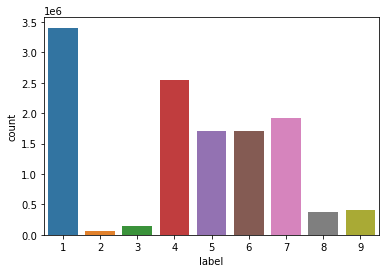

In [16]:
sns.countplot(x="label",data=data)
plt.show()

Our "label" column have much imbalance data.

# Drop column 

"time" column is not important dor our DataSet so we are going to drop it

In [17]:
data = data.drop(["time"], axis=1)

In [18]:
data.head(3)

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,0.376465,0.860840,-0.114746,22.521973,-18.981934,15.075683,-297.0,1432.5,508.5,1
1,0.325684,0.889160,-0.103516,25.085449,3.417969,12.756348,-292.5,1447.5,520.5,1
2,0.269531,0.931641,-0.067383,24.353027,20.019531,11.352539,-297.0,1423.5,523.5,1


# Balance the Data

"Label" column shows imbalance data. Label[2] having least numbers of sample and Label[1] having highest numbers of sample.
If we will take label[1], label[4] as it is, then it is going to be highly overfitted and skewed, so we need to balance the data.

And the shape-size is also very huge of our DataSet, so we will take some samples.

We will be selected 54439 samples from all of other label. 

In [19]:
data["label"].value_counts()

1    3405702
4    2539806
7    1928968
5    1711687
6    1703683
9     405263
8     368607
3     145369
2      54439
Name: label, dtype: int64

In [20]:
Eating = data[data["label"]==1].head(54439).copy()
DRINKING = data[data["label"]==2].head(54439).copy()
WALKING = data[data["label"]==3].head(54439).copy()
STANDING = data[data["label"]==4].head(54439).copy()
LYING = data[data["label"]==5].head(54439).copy()
RUMINATING_STANDING = data[data["label"]==6].head(54439).copy()
RUMINATING_LYING = data[data["label"]==7].head(54439).copy()
GROOMING = data[data["label"]==8].head(54439).copy()
IDLE_OTHER = data[data["label"]==9].head(54439).copy()

In [21]:
Balance_data = pd.DataFrame()
Balance_data = Balance_data.append([Eating,DRINKING,WALKING,STANDING,LYING,RUMINATING_STANDING,RUMINATING_LYING,GROOMING,IDLE_OTHER])
Balance_data.shape

(489951, 10)

In [22]:
Balance_data.head()

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,0.376465,0.860840,-0.114746,22.521973,-18.981934,15.075683,-297.0,1432.5,508.5,1
1,0.325684,0.889160,-0.103516,25.085449,3.417969,12.756348,-292.5,1447.5,520.5,1
2,0.269531,0.931641,-0.067383,24.353027,20.019531,11.352539,-297.0,1423.5,523.5,1
3,0.225098,0.958008,-0.031250,19.104004,23.803711,7.019043,-297.0,1431.0,523.5,1
4,0.204590,0.961426,-0.001953,15.258789,23.193359,2.807617,-286.5,1431.0,538.5,1


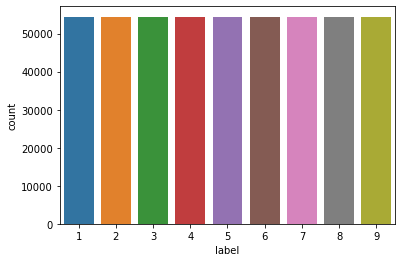

In [23]:
sns.countplot(x="label",data=Balance_data)
plt.show()

Now the DataSet balanced

# Standardization

In [24]:
from sklearn.preprocessing import StandardScaler

Divided all independent variables in X-axis and target variable in Y-axis

In [25]:
X = Balance_data.drop(["label"],axis=1)
Y = Balance_data[["label"]]

In [26]:
print(X.shape)
print(Y.shape)

(489951, 9)
(489951, 1)


In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data=X, columns = ['acc_x','acc_y','acc_z','gyr_x','gyr_y','gyr_z','mag_x','mag_y','mag_z']) 
scaled_X["label"] = Y.values
scaled_X

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,1.802483,0.155018,-0.924051,1.910702,-0.926310,1.485678,-0.574572,0.638302,0.530665,1
1,1.596962,0.208089,-0.872880,2.129863,0.238158,1.268129,-0.543574,0.677581,0.570411,1
2,1.369703,0.287696,-0.708244,2.067246,1.101197,1.136454,-0.574572,0.614735,0.580348,1
3,1.189872,0.337106,-0.543609,1.618487,1.297919,0.729980,-0.574572,0.634375,0.580348,1
4,1.106872,0.343511,-0.410120,1.289746,1.266189,0.334956,-0.502243,0.634375,0.630030,1
...,...,...,...,...,...,...,...,...,...,...
489946,-1.341597,0.179724,0.210602,0.089579,-0.044234,-0.094418,1.233647,-1.522037,-2.549666,9
489947,-1.355430,0.169658,0.195028,0.183505,-0.037888,-0.060068,1.212982,-1.439551,-2.524824,9
489948,-1.369263,0.178809,0.230625,0.094797,-0.037888,0.031532,1.223315,-1.541676,-2.569539,9
489949,-1.367287,0.198024,0.230625,0.126106,-0.066444,-0.077243,1.233647,-1.518109,-2.564570,9


# Frame Preparation

In [28]:
Fs =20
frame_size = Fs*4    #(80 samples)
hop_size = Fs*2      #(40 samples)


In [29]:
def get_frames(df, frame_size, hop_size):
    
    N_FEATURES = 9
    
    frames=[]
    labels=[]
    for i in range(0, len(df) - frame_size, hop_size):
        acc_x = df["acc_x"].values[i : i + frame_size]
        acc_y = df["acc_y"].values[i : i + frame_size]
        acc_z = df["acc_z"].values[i : i + frame_size]
        gyr_x = df["gyr_x"].values[i : i + frame_size]
        gyr_y = df["gyr_y"].values[i : i + frame_size]
        gyr_z = df["gyr_z"].values[i : i + frame_size]
        mag_x = df["mag_x"].values[i : i + frame_size]
        mag_y = df["mag_y"].values[i : i + frame_size]
        mag_z = df["mag_z"].values[i : i + frame_size]
        
        label = stats.mode(df["label"][i: i + frame_size])[0][0]
        frames.append([acc_x, acc_y, acc_z, gyr_x, gyr_y, gyr_z, mag_x, mag_y, mag_z])
        labels.append(label)
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)
    
    return frames, labels

In [30]:
X, Y = get_frames(scaled_X, frame_size, hop_size)

In [31]:
X.shape, Y.shape

((12247, 80, 9), (12247,))

Eariler our X=54439, but now it is 12247, because it has made a frame of 4 sec.

In [32]:
(54439*9)/40

12248.775

# Train_Test_Split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [35]:
X_train.shape, X_test.shape

((9797, 80, 9), (2450, 80, 9))

In [36]:
X_train[0].shape, X_test[0].shape   

((80, 9), (80, 9))

Shape of X_train and X_test is in 3-D, but in [0] index it is 2-D. And we knows that Convolutoin Neural Network always needs 3-D, so we have to reshape this.

In [37]:
X_train = X_train.reshape(9797, 80, 9, 1)
X_test = X_test.reshape(2450, 80, 9, 1)

In [38]:
X_train[0].shape, X_test[0].shape

((80, 9, 1), (80, 9, 1))

Reshaping is done

# 2D CNN Model

In [39]:
model = Sequential()
model.add(Convolution2D(16, (2,2), activation = "relu", input_shape = X_train[0].shape))
model.add(Dropout(0.1))   #10% neurons will be dropout

model.add(Convolution2D(32, (2,2), activation="relu"))
model.add(Dropout(0.2))   #20% neurons will be dropout

model.add(Flatten())

model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))   #50% neurons will be dropout

model.add(Dense(10, activation="softmax"))

In [40]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [41]:
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/10
307/307 [==============================] - 14s 30ms/step - loss: 0.9762 - accuracy: 0.6534 - val_loss: 0.5428 - val_accuracy: 0.8298
Epoch 2/10
307/307 [==============================] - 9s 28ms/step - loss: 0.6210 - accuracy: 0.7890 - val_loss: 0.4071 - val_accuracy: 0.8731
Epoch 3/10
307/307 [==============================] - 9s 28ms/step - loss: 0.5240 - accuracy: 0.8234 - val_loss: 0.3663 - val_accuracy: 0.8853
Epoch 4/10
307/307 [==============================] - 8s 27ms/step - loss: 0.4684 - accuracy: 0.8411 - val_loss: 0.3438 - val_accuracy: 0.8922
Epoch 5/10
307/307 [==============================] - 8s 27ms/step - loss: 0.4367 - accuracy: 0.8553 - val_loss: 0.3620 - val_accuracy: 0.8878
Epoch 6/10
307/307 [==============================] - 9s 29ms/step - loss: 0.3992 - accuracy: 0.8600 - val_loss: 0.3298 - val_accuracy: 0.8931
Epoch 7/10
307/307 [==============================] - 9s 28ms/step - loss: 0.3676 - accuracy: 0.8712 - val_loss: 0.3304 - val_accuracy: 0.897

At the very first step it has 65% training and 82% of validation accuracy, but after 10 epochs we can see it has 88% of training 
accuracy and 90% of validation accuracy

# Graphical Representation

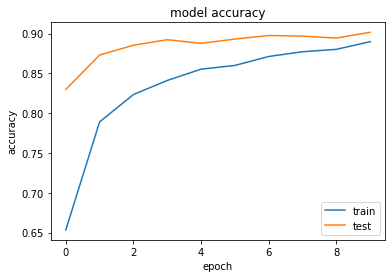

In [42]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="lower right")
plt.show()

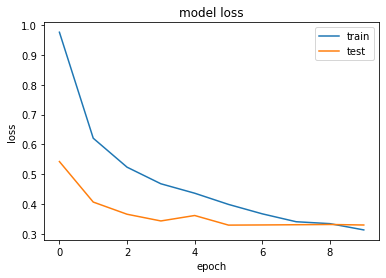

In [43]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"])
plt.show()

We can see here, Validation_loss is less than Validation_Accuracy, so we can say that our model neither overfitting nor 
underfitting. We can make sure that we achieve 90% of Accuracy

# Evaluation Matrix
   Accuracy, 
   Confusion_Matrix, 
   Classification_Report

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [45]:
Y_pred = model.predict_classes(X_test)

In [46]:
accuracy_score(Y_test,Y_pred)

0.9016326530612245

In [47]:
matrix = confusion_matrix(Y_test, Y_pred)
matrix

array([[261,   0,   0,   3,   0,   0,   0,   8,   0],
       [  0, 256,  13,   2,   0,   0,   0,   2,   0],
       [  3,   1, 248,   0,   0,   0,   0,  20,   0],
       [ 21,   0,   1, 221,   1,   7,   3,  18,   0],
       [  0,   0,   0,   0, 259,   0,  10,   2,   1],
       [  5,   0,   2,  21,   1, 235,   0,   8,   0],
       [  0,   0,   0,   0,  12,   0, 258,   2,   1],
       [ 16,   0,   4,  15,   1,   6,   4, 226,   0],
       [  0,   0,   1,   0,  21,   0,   4,   1, 245]], dtype=int64)

In [48]:
CR=print(classification_report(Y_test,Y_pred))
CR

              precision    recall  f1-score   support

           1       0.85      0.96      0.90       272
           2       1.00      0.94      0.97       273
           3       0.92      0.91      0.92       272
           4       0.84      0.81      0.83       272
           5       0.88      0.95      0.91       272
           6       0.95      0.86      0.90       272
           7       0.92      0.95      0.93       273
           8       0.79      0.83      0.81       272
           9       0.99      0.90      0.94       272

    accuracy                           0.90      2450
   macro avg       0.90      0.90      0.90      2450
weighted avg       0.90      0.90      0.90      2450



As we can see in classification_report, the F1-score for every Activities-Labels are more than 80%.